# Discriminant Analysis and Naive Bayes Homework

## Problem 1 
- Multivariate Gaussian Distribution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
np.random.seed(100)

## Part A
- the multivariate_normal constructor depends on **mean** and **cov**, where **mean** is the center of the multivariate Gaussian distribution and **cov** is the $N\times N$ covariance matrix ($N$ is the number of features)
- Generate two **2D** **multivariate_normal** objects, one with **mean=[1,1]**, **cov=[[2,0.6],[0.6,2]]**, another one with **mean=[10,4]** and **cov=[[1,0],[0,1]]**
- Use **rvs** method of the **multivariate_normal** objects to generate $1000$ and $500$ samples, respectively.
- Plot these data points in a single scatter plot using plt.scatter 

In [2]:
cov1 = [[2,0.6],[0.6,2]]
gd = multivariate_normal(?)
gd2 = multivariate_normal(?)


xy  = gd.rvs(?)
xy2 = gd2.rvs(?)

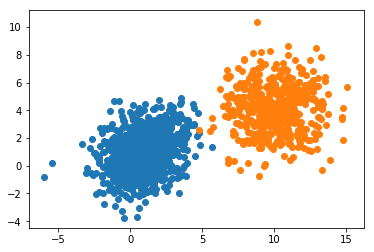

In [3]:
plt.scatter(xy[:,0], xy[:,1])
plt.scatter(xy2[:,0], xy2[:,1])

## Part B
- Run a linear regression on the first $1000$ data points with **mean=[1,1]**, **cov=[[2,0.6],[0.6,2]]**
- Please explain the relationship between the regression slope coefficient and the covariance matrix of the data

In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(?, ?)

//anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
lm.coef_

array([0.28818117])

## Interpretation of the Slope Coefficient
- ?

## Part C
- Fit a quadratic discriminant analysis model on the $1500$ data such that the first $1000$ samples are labeled class $0$ and the latter $500$ labeled class $1$.
- In order for the model to store the model covariance matrices for both classes, we turn on **store_covariance** of **QDA** to True
- Investigate the means, covariance matrices and priors of the data by checking the **means_**, **covariance_** and
**priors_** attributes of the model object. Verify the estimated means are approximatedly equal to the means and covariances
we specify before data generation
- What is the meaning of **priors**?

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [7]:
QDA  = QuadraticDiscriminantAnalysis(store_covariance=True)

data = np.concatenate(?, axis=?)
labels = ?  # how to generate the classes labels of the 1000 + 500 samples?

QDA.fit(data, labels)

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
QDA.means_

array([[ 1.00003881,  0.95035253],
       [10.13672307,  4.11882287]])

- The means of the two classes are very close to their theorectical values

In [9]:
QDA.covariance_

[array([[2.10235051, 0.60585782],
        [0.60585782, 2.09741062]]), array([[3.10657587, 0.0937602 ],
        [0.0937602 , 2.83965482]])]

- Again the estimated covariance matrices are close to their true values

In [10]:
QDA.priors_

array([0.66666667, 0.33333333])

- The priors reflect the sample-count-ratio 

## Part D
- Overlay on the two-class data scatterplot and the **QDA** decision boundary
- The main ingradients to plot the decision boundary are 
      - the decision_function of the **QDA** model object
      - the np.meshgrid function (to generate a 2D lattice grid)
      - plt.contour for a **contour** plot  
- Please fill in the following code segment (on ? parts) to outline the decision boundary 
- Research online for the basic properties of np.meshgrid, plt.contour if it is necessary

## Please try to Finish the Code Below

X = np.linspace(-10,10,100)

Y = np.linspace(-10,10,100)

X, Y = np.meshgrid(X,Y)  # Generate a 100 x 100 lattice grid of x, y  coordinates

Z = QDA.decision_function(?)

Z = Z.reshape((100,100)) # need to reshape the output from (10000,1) to (100, 100)
 
plt.scatter(?)

plt.scatter(?)

plt.contour(?, levels=[0])

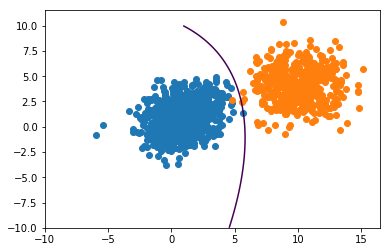

## Problem 2
- Given a two step random number generation procedure as being described below, please determine the **PDF** 
(probability density function) of the resulting distribution.
- Step I: Drawing an unfair coin with faces $A$ and $B$, $70\%$ to face $A$, and $30\%$ to face $B$.
- Step IIA: Given that the outcome in step I is $A$, draw a random number from the following distribution
with **pdf** called **pdf_A**,    


Text(0.5,1,'pdf of distribution A')

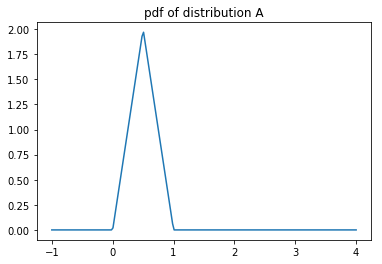

In [1]:
def pdf_A(x):
    if x < 0 or x > 1: return 0
    elif x < 0.5:
        return 4 * x
    elif x > 0.5:
        return -4 * (x - 1)

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

X = np.linspace(-1.0,4.0,200)
Y = np.array(list(map(pdf_A, X)))
plt.plot(X, Y)
plt.title('pdf of distribution A')

- Step IIB: Given that the outcome in step II is $B$, draw a random number from the following distribution with
**pdf** called **pdf_B**.

Text(0.5,1,'pdf of distribution B')

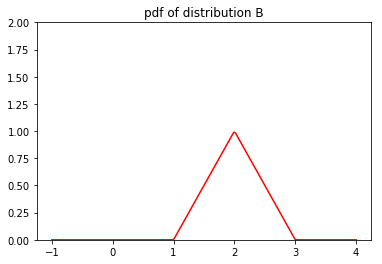

In [3]:
def pdf_B(x):
    if x < 1 or x > 3: return 0
    elif x < 2:
        return 1 * (x-1)
    elif x > 2:
        return -1 * (x - 3)

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

X = np.linspace(-1.0,4.0,200)
Y = np.array(list(map(pdf_B, X)))
plt.plot(X, Y, 'r')
plt.ylim((0,2))
plt.title('pdf of distribution B')

## What is the PDF?
- Based on the above description of the two step process, please define the **pdf** of the resulting random variable and plot it.

${\bf Hint}$: Bayes theorem and the discussion in our lecture on "red/black balls in two boxes" are relevant.

In [4]:
def pdf(x):
    pass

## plotting your pdf below

### Problem 3

There are three files in the "data" folder:

    - "spam_train.csv"
    - "spam_test.csv"
    - "spam.txt"

The file "spam_train.csv" in the "data" folder contains 2300 emails and 58 variables. The last variable "spam" is a factor with two levels: "email", "spam". If you want to know more information about the data set, please read the file "spam.txt".

Your assignment is based on the "spam_train.csv" file, try to build a classifier to predict the variable "spam". 
You need to write a report on ***LogisticRegression, LDA, QDA, GNB, MNB, BNB*** models we have learned. Be sure to record:

- (1) The features you used to make your prediction.
- (2) The corresponding accuracy on the training set.
- (3) The corresponding accuracy on the test set (spam_test.csv).
- (4) The comparative performance of the models.

    
The following codes may be a useful beginning:

In [12]:
# import required libraries
import pandas as pd
import numpy as np

# read in the train and test csv
train = pd.read_csv('data/spam_train.csv')
test = pd.read_csv('data/spam_test.csv')

# separate the predictors and response in the training data set
x_train = np.array(train.iloc[:, 0:57])
y_train = np.array(train.iloc[:, -1])

# separate the predictors and response in the test data set
x_test = np.array(test.iloc[:, 0:57])
y_test = np.array(test.iloc[:, -1])

## have a look at the training data set
train.head()

,A.1,A.2,A.3,A.4,A.5,A.6,A.7,A.8,A.9,A.10,...,A.49,A.50,A.51,A.52,A.53,A.54,A.55,A.56,A.57,spam
0,0.32,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.234,0.0,0.058,0.0,0.0,1.068,3,47,email
1,0.00,0.0,0.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.342,0.0,0.0,1.000,1,31,email
2,0.00,0.0,0.00,0.0,0.00,0.17,0.0,0.0,0.0,0.0,...,0.0,0.055,0.0,0.000,0.0,0.0,1.685,7,204,email
3,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.800,5,9,email
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.471,0.0,0.000,0.0,0.0,1.424,8,47,email


In [13]:
# import ML models
from sklearn import linear_model, discriminant_analysis, naive_bayes

logit = linear_model.LogisticRegression()
LDA  = discriminant_analysis.LinearDiscriminantAnalysis()
QDA  = discriminant_analysis.QuadraticDiscriminantAnalysis()
GNB  = naive_bayes.GaussianNB()
MNB  = naive_bayes.MultinomialNB()
BNB  = naive_bayes.BernoulliNB(binarize=1.5)

## Saving the list of models into a pandas series
- To write clean code, we save all the models above into a list of models
- Then we convert them into a pandas series of models

In [14]:
modelList = [logit, LDA, QDA, GNB, MNB, BNB]
modelSeries = pd.Series(modelList, index=['Logitistic', 'LDA', 'QDA', 'GNB', 'MNB', 'BNB'])

- Fit the models within the pd.Series using pd.Series **apply** method and a lambda function derived from model.fit

In [15]:
# fit all the models to the training data
# How to do it when the models are stored in a pandas Series?
modelSeries.?

//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Logitistic    LogisticRegression(C=1.0, class_weight=None, d...
LDA           LinearDiscriminantAnalysis(n_components=None, ...
QDA           QuadraticDiscriminantAnalysis(priors=None, reg...
GNB                                     GaussianNB(priors=None)
MNB           MultinomialNB(alpha=1.0, class_prior=None, fit...
BNB           BernoulliNB(alpha=1.0, binarize=1.5, class_pri...
dtype: object

In [16]:
# calculate the train/test accuracy
ans = modelSeries.apply(?)
ans.columns = ['train score', 'test score']
ans

,train score,test score
Logitistic,0.931304,0.924381
LDA,0.891739,0.897001
QDA,0.826087,0.807910
GNB,0.830870,0.817036
MNB,0.810870,0.798783
BNB,0.846087,0.834854


## Warning on covariance matrix estimation
- We notice that the above fitting function call produces a warning message
- It is from **QDA**, which has difficulty to estimate **non-degenerate** per-class covariance matricies with insufficient amount of data
- To remedy this, we use the **reg_param** parameter of **QDA** and change it from the default $0$ to $0.5$
- This means we average the naive sample covariance with the identity matrix using $50\%$, $50\%$ weights
- Please visit http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html
for the meaning of **reg_param**
- What happens to the accuracies of **QDA** after this adjustment?

In [17]:
modelSeries['QDA'].?
modelSeries.apply(?) # fit all the models within the pandas Series
ans2 = modelSeries.apply(?)
ans2.columns = ['train score', 'test score']
ans2

//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,train score,test score
Logitistic,0.931304,0.924381
LDA,0.891739,0.897001
QDA,0.860000,0.855715
GNB,0.830870,0.817036
MNB,0.810870,0.798783
BNB,0.846087,0.834854


## Where Does the Improvement Come From?
- For **QDA**, the train score and test score improve by $3.4\%$, $4.7\%$, respectively.
- The gap of train-test scores reduces, too
- The improvement of accuracies is due to the improvement of estimation of the per-class **sample covariance** matrices
- Unlike **LDA**, **QDA** needs to estimate a distinct covariance matrix for each class. A poor estimation often leads to
poor model.  Even though **QDA** is more expressive than **LDA**, the performance of **LDA** is better than **QDA** both for train
set and test set.

In [18]:
# Explanation
# For each model, we used all 57 features in the dataset.
# We can see that in training accuracy, the highest score comes form the logistic regression, 
# while the multinomial naive bayes model is the worst one in this case.

# For all models except LDA, 
# the test acuracy is lower than tihe training
# because the algorithms slightly overfit the trained data.

# Furthermore, since MNB is widely used in the spam filter problem, 
# we would think it would not perform so poorly. 
# Let's try to make it better.
# If you have read the file "spam.text", 
# you may notice that only the first 48 continuous features refers to the word frequency. 
# Since we used more features than that, let's cut it down

In [19]:
# create x_train for just the first 47 features & fit the model
x_48 = train.iloc[:, 0:48]
MNB.fit(x_48, y_train)

#report the results
print("The accuracy of Multinomial Naive Bayes in the training set is: " + str(MNB.score(x_48, y_train)) + '\n')
print("The accuracy of Multinomial Naive Bayes in the test set is: " + str(MNB.score(test.iloc[:, 0:48], y_test)))

The accuracy of Multinomial Naive Bayes in the training set is: 0.871304347826087

The accuracy of Multinomial Naive Bayes in the test set is: 0.85832246849196


In [20]:
# Explanation #2

# While in the previous Multinomial Naive Bayes model, 
# the accuracies in the training set and test set are: 0.81086957 and 0.79878314, 
# after discarding a few features, it performs better. 
# This indicates that more features may not be better. 
# Although logisitic regression and LDA still perform better than MNB overall,
# MNB is powerful becuase its computation complexity is low.

# Theory Questions

1. Why is joint probability P(X, Y) equivalent to P(X)*P(Y) when events X and Y are independent?
2. What is discriminant analysis?
3. What makes a Naive Bayes classifier "naive"?
4. When would you use Bernoulli NB vs. Multinomial NB?